In [1]:
import os
import sys
import time
import random
import pandas as pd
from pathlib import Path
import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from side_info_decoding.utils import (
    set_seed, 
    load_data_from_pids, 
    sliding_window_over_trials
)
from side_info_decoding.reduced_rank import (
    Reduced_Rank_Model, 
    train_reduced_rank, 
    model_eval
)

seed = 666
set_seed(seed)

In [2]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=2)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 10

In [3]:
pids = [
    "dab512bd-a02d-4c1f-8dbc-9155a163efc0",
    "febb430e-2d50-4f83-87a0-b5ffbb9a4943",
    "523f8301-4f56-4faf-ab33-a9ff11331118",
    "84bb830f-b9ff-4e6b-9296-f458fb41d160",
    '0b8ea3ec-e75b-41a1-9442-64f5fbc11a5a',
    '143dd7cf-6a47-47a1-906d-927ad7fe9117',
    '16799c7a-e395-435d-a4c4-a678007e1550',
    '1a60a6e1-da99-4d4e-a734-39b1d4544fad',
    '1e176f17-d00f-49bb-87ff-26d237b525f1',
    '31f3e083-a324-4b88-b0a4-7788ec37b191'
]

In [4]:
X_dict, Y_dict = load_data_from_pids(
    pids,
    brain_region="lp",
    behavior="choice",
    data_type="all_ks",
    n_t_bins = 30
)

pulling data from ibl database ..
eid: d23a44ef-1402-4ed7-97f5-47e9a7a504d9
pid: dab512bd-a02d-4c1f-8dbc-9155a163efc0
number of trials found: 265 (active: 265)
prior for this session is not found.
found 265 trials from 17.56 to 2310.24 sec.
found 131 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 265/265 [00:00<00:00, 1498.57it/s]


pulling data from ibl database ..
eid: db4df448-e449-4a6f-a0e7-288711e7a75a
pid: febb430e-2d50-4f83-87a0-b5ffbb9a4943
number of trials found: 230 (active: 230)
prior for this session is not found.
found 230 trials from 40.81 to 2252.10 sec.
found 74 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 230/230 [00:00<00:00, 5196.53it/s]


pulling data from ibl database ..
eid: 88224abb-5746-431f-9c17-17d7ef806e6a
pid: 523f8301-4f56-4faf-ab33-a9ff11331118
number of trials found: 300 (active: 300)
prior for this session is not found.
found 300 trials from 37.78 to 2123.22 sec.
found 48 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 300/300 [00:00<00:00, 2692.85it/s]


pulling data from ibl database ..
eid: c7248e09-8c0d-40f2-9eb4-700a8973d8c8
pid: 84bb830f-b9ff-4e6b-9296-f458fb41d160
number of trials found: 397 (active: 397)
prior for this session is not found.
found 397 trials from 17.65 to 3851.03 sec.
found 181 Kilosort units in region lp


Compute spike count: 100%|███████████████████| 397/397 [00:01<00:00, 306.10it/s]


pulling data from ibl database ..
eid: a4a74102-2af5-45dc-9e41-ef7f5aed88be
pid: 0b8ea3ec-e75b-41a1-9442-64f5fbc11a5a
number of trials found: 293 (active: 293)
prior for this session is not found.
found 293 trials from 69.71 to 1849.44 sec.
found 123 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 293/293 [00:00<00:00, 1181.31it/s]


pulling data from ibl database ..
eid: 3638d102-e8b6-4230-8742-e548cd87a949
pid: 143dd7cf-6a47-47a1-906d-927ad7fe9117
number of trials found: 283 (active: 283)
prior for this session is not found.
found 283 trials from 42.00 to 4761.48 sec.
found 208 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 283/283 [00:00<00:00, 2927.03it/s]


pulling data from ibl database ..
eid: 0a018f12-ee06-4b11-97aa-bbbff5448e9f
pid: 16799c7a-e395-435d-a4c4-a678007e1550
number of trials found: 228 (active: 228)
prior for this session is not found.
found 228 trials from 142.29 to 2526.63 sec.
found 122 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 228/228 [00:00<00:00, 1783.40it/s]


pulling data from ibl database ..
eid: 51e53aff-1d5d-4182-a684-aba783d50ae5
pid: 1a60a6e1-da99-4d4e-a734-39b1d4544fad
number of trials found: 293 (active: 293)
prior for this session is not found.
found 293 trials from 20.56 to 2602.49 sec.
found 109 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 293/293 [00:00<00:00, 1759.94it/s]


pulling data from ibl database ..
eid: a8a8af78-16de-4841-ab07-fde4b5281a03
pid: 1e176f17-d00f-49bb-87ff-26d237b525f1
number of trials found: 333 (active: 333)
prior for this session is not found.
found 333 trials from 129.08 to 3563.50 sec.
found 63 Kilosort units in region lp


Compute spike count: 100%|██████████████████| 333/333 [00:00<00:00, 2316.21it/s]


pulling data from ibl database ..
eid: 61e11a11-ab65-48fb-ae08-3cb80662e5d6
pid: 31f3e083-a324-4b88-b0a4-7788ec37b191
number of trials found: 529 (active: 529)


/home/yizi/anaconda3/envs/clusterless/lib/python3.8/site-packages/brainbox/behavior/wheel.py:84: RuntimeWarning: divide by zero encountered in true_divide
  vel = dp / dt


prior for this session is not found.
found 529 trials from 106.48 to 4366.14 sec.
found 143 Kilosort units in region lp


Compute spike count: 100%|███████████████████| 529/529 [00:00<00:00, 740.26it/s]


In [5]:
# an example of model training for 1 session

start_time = time.time()

example_pid = pids[0]
print(f"trainning reduced rank model on session {example_pid[:8]} ..")

R = 2 # rank
d = 0 # half window size
n_epochs = 5000

# prepare data
X, Y = X_dict[example_pid], Y_dict[example_pid]
K, C, T = X.shape
X = sliding_window_over_trials(X, half_window_size=d)
Y = sliding_window_over_trials(Y, half_window_size=d)
X, Y = torch.tensor(X), torch.tensor(Y)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=seed)

rrm = Reduced_Rank_Model(
    n_units=C, 
    n_t_bins=T, 
    rank=R, 
    half_window_size=d
)

# training
rrm, train_losses = train_reduced_rank(
    model=rrm,
    train_dataset=(train_X, train_Y),
    test_dataset=(test_X, test_Y),
    loss_function=torch.nn.BCELoss(),
    learning_rate=1e-3,
    weight_decay=1e-1,
    n_epochs=5000,
)

# eval
test_U, test_V, test_metrics = model_eval(
    rrm, 
    train_dataset=(train_X, train_Y),
    test_dataset=(test_X, test_Y),
    model_type="reduced_rank", 
    behavior="choice"
)

end_time = time.time()
print(f"time spent: {end_time - start_time: .3f} seconds")

trainning reduced rank model on session dab512bd ..
Epoch [500/5000], Loss: 26.79505957042716
Epoch [1000/5000], Loss: 7.549857490263567
Epoch [1500/5000], Loss: 0.6583613693082498
Epoch [2000/5000], Loss: 0.037912430835323765
Epoch [2500/5000], Loss: 0.049319930339616826
Epoch [3000/5000], Loss: 0.06032164279584072
Epoch [3500/5000], Loss: 0.0654331837378161
Epoch [4000/5000], Loss: 0.06712662925572942
Epoch [4500/5000], Loss: 0.06736561493302953
Epoch [5000/5000], Loss: 0.06740793890848482
train accuracy: 1.000 auc: 0.849
test accuracy: 0.849 auc: 0.943
time spent:  8.969 seconds


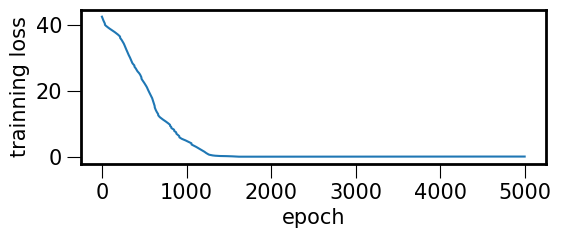

In [41]:
plt.figure(figsize=(6,2))
plt.plot(train_losses)
plt.xlabel("epoch")
plt.ylabel("trainning loss")
plt.show()

In [8]:
# example of performing 5-fold CV on all sessions

start_time = time.time()

R = 2 # rank
d = 0 # half window size
n_epochs = 5000

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

Us, Vs, metrics = {}, {}, {}
for pid in pids:
    
    print(f"start cross validation on session {pid[:8]} ..")
    X, Y = X_dict[pid], Y_dict[pid]
    K, C, T = X.shape
    X = sliding_window_over_trials(X, half_window_size=d)
    Y = sliding_window_over_trials(Y, half_window_size=d)
    X, Y = torch.tensor(X), torch.tensor(Y)
    
    U_per_fold, V_per_fold, metrics_per_fold = [], [], []
    for fold_idx, (train, test) in enumerate(skf.split(X, Y)):
        
        print(f"start training on fold {fold_idx+1} ..")
        train_X, test_X = X[train], X[test]
        train_Y, test_Y = Y[train], Y[test]

        rrm = Reduced_Rank_Model(
            n_units=C, 
            n_t_bins=T, 
            rank=R, 
            half_window_size=d
        )

        # training
        rrm, train_losses = train_reduced_rank(
            model=rrm,
            train_dataset=(train_X, train_Y),
            test_dataset=(test_X, test_Y),
            loss_function=torch.nn.BCELoss(),
            learning_rate=1e-3,
            weight_decay=1e-1,
            n_epochs=5000,
        )

        # eval
        test_U, test_V, test_metrics = model_eval(
            rrm, 
            train_dataset=(train_X, train_Y),
            test_dataset=(test_X, test_Y),
            model_type="reduced_rank", 
            behavior="choice"
        )
        U_per_fold.append(test_U)
        V_per_fold.append(test_V)
        metrics_per_fold.append(test_metrics)
        
    Us.update({pid: U_per_fold})
    Vs.update({pid: V_per_fold})
    metrics.update({pid: metrics_per_fold})

end_time = time.time()
print(f"time spent: {end_time - start_time: .3f} seconds")

start cross validation on session dab512bd ..
start training on fold 1 ..
Epoch [500/5000], Loss: 15.53937951402561
Epoch [1000/5000], Loss: 4.766296517779064
Epoch [1500/5000], Loss: 0.04120001167311068
Epoch [2000/5000], Loss: 0.052437301924713076
Epoch [2500/5000], Loss: 0.06309238815823587
Epoch [3000/5000], Loss: 0.06484595672833536
Epoch [3500/5000], Loss: 0.06689335114040242
Epoch [4000/5000], Loss: 0.06823491825502923
Epoch [4500/5000], Loss: 0.06908131857383595
Epoch [5000/5000], Loss: 0.06952875227727658
train accuracy: 0.991 auc: 0.906
test accuracy: 0.906 auc: 0.969
start training on fold 2 ..
Epoch [500/5000], Loss: 19.605680985754514
Epoch [1000/5000], Loss: 9.079502186205676
Epoch [1500/5000], Loss: 0.8645957955201707
Epoch [2000/5000], Loss: 0.04576037619715931
Epoch [2500/5000], Loss: 0.056415919497423375
Epoch [3000/5000], Loss: 0.06421819730505475
Epoch [3500/5000], Loss: 0.06499026205967225
Epoch [4000/5000], Loss: 0.06527327477113605
Epoch [4500/5000], Loss: 0.0657

In [25]:
metrics_dict = {}
for pid in pids:
    metrics_dict.update({pid: np.mean(metrics[pid], 0)})
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df.columns = ["accuracy", "auc"]
metrics_df

,accuracy,auc
dab512bd-a02d-4c1f-8dbc-9155a163efc0,0.920755,0.966795
febb430e-2d50-4f83-87a0-b5ffbb9a4943,0.917391,0.968674


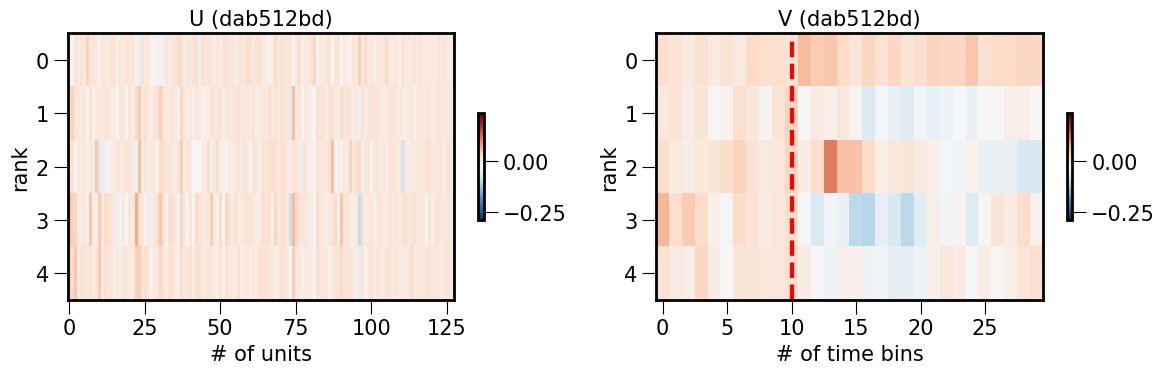

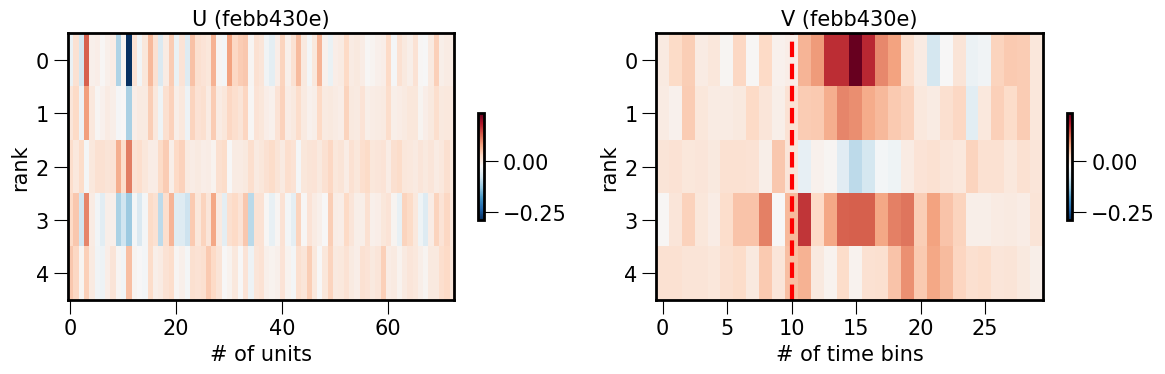

In [73]:
Us_plot, Vs_plot = [], []
for pid in pids:
    # average U and V across trials
    Us_plot.append(np.array(Us[pid]).mean(0))
    Vs_plot.append(np.array(Vs[pid]).mean(0).squeeze().T)
u_min, u_max = np.min(np.concatenate(Us_plot)), np.max(np.concatenate(Us_plot))
v_min, v_max = np.min(np.concatenate(Vs_plot)), np.max(np.concatenate(Vs_plot))
c_min, c_max = np.min([u_min, v_min]), np.max([u_max, v_max])
    
for pid_idx, pid in enumerate(pids):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
    heatmap1 = ax1.imshow(Us_plot[pid_idx].T, aspect="auto", cmap="RdBu_r", vmin=c_min, vmax=c_max)
    heatmap2 = ax2.imshow(Vs_plot[pid_idx].T, aspect="auto", cmap="RdBu_r", vmin=c_min, vmax=c_max)
    ax2.axvline(x=10, c="red", linestyle="--", linewidth=3)
    cbar = fig.colorbar(heatmap1, ax=ax1, shrink=0.4)
    cbar = fig.colorbar(heatmap2, ax=ax2, shrink=0.4)
    ax1.set_ylabel("rank")
    ax1.set_xlabel("# of units")
    ax1.set_title(f"U ({pid[:8]})")
    ax2.set_ylabel("rank")
    ax2.set_xlabel("# of time bins")
    ax2.set_title(f"V ({pid[:8]})")
    plt.tight_layout()